In [167]:
import os
import requests
import zipfile
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
# reading COT data

urls = {
    'annual_2017': 'https://www.cftc.gov/files/dea/history/dea_fut_xls_2017.zip',
    'annual_2018': 'https://www.cftc.gov/files/dea/history/dea_fut_xls_2018.zip',
    'annual_2019': 'https://www.cftc.gov/files/dea/history/dea_fut_xls_2019.zip',
    'annual_2020': 'https://www.cftc.gov/files/dea/history/dea_fut_xls_2020.zip',
    'annual_2021': 'https://www.cftc.gov/files/dea/history/dea_fut_xls_2021.zip',
    'annual_2022': 'https://www.cftc.gov/files/dea/history/dea_fut_xls_2022.zip',
    'annual_2023': 'https://www.cftc.gov/files/dea/history/dea_fut_xls_2023.zip',
    'annual_2024': 'https://www.cftc.gov/files/dea/history/dea_fut_xls_2024.zip'
}

In [169]:
extracted_dir = 'data'
os.makedirs(extracted_dir, exist_ok=True)

In [170]:
# unpacking the data

for name, url in urls.items():
    zip_file_path = f'{name}.zip'

    response = requests.get(url)
    response.raise_for_status()
    with open(zip_file_path, 'wb') as file:
        file.write(response.content)

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for member in zip_ref.namelist():
            filename = os.path.basename(member)
            if filename:
                extracted_file_path = os.path.join(extracted_dir, f'{name}_{filename}')
                with zip_ref.open(member) as source, open(extracted_file_path, 'wb') as target:
                    target.write(source.read())

    os.remove(zip_file_path)

In [171]:
# download historical EURUSD data

end_date = datetime.today()
start_date = "2017-01-01"  

data_eurusd = yf.download(
    "EURUSD=X",
    start=start_date,  
    end=end_date.strftime('%Y-%m-%d'),  
    interval="1d"
)

file_path = "data/eurusd_daily_data.csv"
data_eurusd.to_csv(file_path)

[*********************100%***********************]  1 of 1 completed


In [172]:
# processing all .xls files in the extract dir directory, loading their contents into DataFrames, merging these DataFrames into one and saving the result in a CSV file data/annual_merged_data.csv

dfs = []
for file in os.listdir(extracted_dir):
    if file.endswith('.xls'):
        file_path = os.path.join(extracted_dir, file)
        df = pd.read_excel(file_path)
        dfs.append(df)

mdf = pd.concat(dfs, ignore_index=True)
output_csv_path = 'data/annual_merged_data.csv'
mdf.to_csv(output_csv_path, index=False)

In [173]:
cot_data = pd.read_csv(output_csv_path)

print("Column Names:")
print(cot_data.columns.tolist())

Column Names:
['Market_and_Exchange_Names', 'As_of_Date_In_Form_YYMMDD', 'Report_Date_as_MM_DD_YYYY', 'CFTC_Contract_Market_Code', 'CFTC_Market_Code', 'CFTC_Region_Code', 'CFTC_Commodity_Code', 'Open_Interest_All', 'NonComm_Positions_Long_All', 'NonComm_Positions_Short_All', 'NonComm_Postions_Spread_All', 'Comm_Positions_Long_All', 'Comm_Positions_Short_All', 'Tot_Rept_Positions_Long_All', 'Tot_Rept_Positions_Short_All', 'NonRept_Positions_Long_All', 'NonRept_Positions_Short_All', 'Open_Interest_Old', 'NonComm_Positions_Long_Old', 'NonComm_Positions_Short_Old', 'NonComm_Positions_Spread_Old', 'Comm_Positions_Long_Old', 'Comm_Positions_Short_Old', 'Tot_Rept_Positions_Long_Old', 'Tot_Rept_Positions_Short_Old', 'NonRept_Positions_Long_Old', 'NonRept_Positions_Short_Old', 'Open_Interest_Other', 'NonComm_Positions_Long_Other', 'NonComm_Positions_Short_Other', 'NonComm_Positions_Spread_Other', 'Comm_Positions_Long_Other', 'Comm_Positions_Short_Other', 'Tot_Rept_Positions_Long_Other', 'Tot_Re

In [174]:
unique_values_cot = cot_data['Market_and_Exchange_Names'].unique()
print(unique_values_cot)

['WHEAT-SRW - CHICAGO BOARD OF TRADE' 'WHEAT-HRW - CHICAGO BOARD OF TRADE'
 'WHEAT-HRSpring - MINNEAPOLIS GRAIN EXCHANGE'
 'CORN - CHICAGO BOARD OF TRADE' 'OATS - CHICAGO BOARD OF TRADE'
 'SOYBEANS - CHICAGO BOARD OF TRADE'
 'MINI SOYBEANS - CHICAGO BOARD OF TRADE'
 'CALIF CARBON ALL VINTAGE 2016 - ICE FUTURES ENERGY DIV'
 'NJ SRECS VINTAGE 2017 - ICE FUTURES ENERGY DIV'
 'NJ SRECS VINTAGE 2018 - ICE FUTURES ENERGY DIV'
 'CALIF CARBON ALL VINTAGE 2017 - ICE FUTURES ENERGY DIV'
 'RGGI VINTAGE 2016 - ICE FUTURES ENERGY DIV'
 'CALIF CARBON ALL VINTAGE 2018 - ICE FUTURES ENERGY DIV'
 'NJ SRECS VINTAGE 2019 - ICE FUTURES ENERGY DIV'
 'NJ SRECS VINTAGE 2020 - ICE FUTURES ENERGY DIV'
 'PJM TRI-RECs CLASS 1 Vin 2017 - ICE FUTURES ENERGY DIV'
 'PJM TRI-RECs CLASS 1 Vin 2018 - ICE FUTURES ENERGY DIV'
 'PJM TRI-RECs CLASS 1 Vin 2019 - ICE FUTURES ENERGY DIV'
 'RGGI VINTAGE 2017 - ICE FUTURES ENERGY DIV'
 'SOYBEAN OIL - CHICAGO BOARD OF TRADE'
 'U.S. TREASURY BONDS - CHICAGO BOARD OF TRADE'
 'ULTR

In [175]:
# This script filters Commitment of Traders (COT) data for the EURO FX market on the Chicago Mercantile Exchange (CME)
# and saves the filtered dataset to a CSV file for further analysis.

filtered_data = cot_data[cot_data['Market_and_Exchange_Names'] == 'EURO FX - CHICAGO MERCANTILE EXCHANGE']

filtered_file_path = "data/cot_eur.csv"
filtered_data.to_csv(filtered_file_path, index=False)

In [176]:
# Loads the filtered COT data for EURO FX from the CSV file and displays the first five rows

cot_eur_data = pd.read_csv(filtered_file_path)
cot_eur_data.head()

Market_and_Exchange_Names  As_of_Date_In_Form_YYMMDD  \
0  EURO FX - CHICAGO MERCANTILE EXCHANGE                     171226   
1  EURO FX - CHICAGO MERCANTILE EXCHANGE                     171219   
2  EURO FX - CHICAGO MERCANTILE EXCHANGE                     171212   
3  EURO FX - CHICAGO MERCANTILE EXCHANGE                     171205   
4  EURO FX - CHICAGO MERCANTILE EXCHANGE                     171128   

  Report_Date_as_MM_DD_YYYY  CFTC_Contract_Market_Code CFTC_Market_Code  \
0                2017-12-26                      99741             CME    
1                2017-12-19                      99741             CME    
2                2017-12-12                      99741             CME    
3                2017-12-05                      99741             CME    
4                2017-11-28                      99741             CME    

   CFTC_Region_Code  CFTC_Commodity_Code  Open_Interest_All  \
0                 0                   99             497744   
1                 0                   99             485622   
2                 0                   99             505744   
3                 0                   99             499124   
4                 0                   99             495561   

   NonComm_Positions_Long_All  NonComm_Positions_Short_All  ...  \
0                      208913                       116765  ...   
1                      198398                       112174  ...   
2                      206027                        92138  ...   
3                      205400                       112294  ...   
4                      205160                       115479  ...   

   Conc_Net_LE_8_TDR_Short_Old  Conc_Gross_LE_4_TDR_Long_Other  \
0                         56.0                             0.0   
1                         55.5                             0.0   
2                         47.5                             0.0   
3                         48.0                             0.0   
4                         47.9                             0.0   

   Conc_Gross_LE_4_TDR_Short_Other  Conc_Gross_LE_8_TDR_Long_Other  \
0                              0.0                             0.0   
1                              0.0                             0.0   
2                              0.0                             0.0   
3                              0.0                             0.0   
4                              0.0                             0.0   

   Conc_Gross_LE_8_TDR_Short_Other  Conc_Net_LE_4_TDR_Long_Other  \
0                              0.0                           0.0   
1                              0.0                           0.0   
2                              0.0                           0.0   
3                              0.0                           0.0   
4                              0.0                           0.0   

   Conc_Net_LE_4_TDR_Short_Other  Conc_Net_LE_8_TDR_Long_Other  \
0                            0.0                           0.0   
1                            0.0                           0.0   
2                            0.0                           0.0   
3                            0.0                           0.0   
4                            0.0                           0.0   

   Conc_Net_LE_8_TDR_Short_Other              Contract_Units  
0                            0.0  (CONTRACTS OF EUR 125,000)  
1                            0.0  (CONTRACTS OF EUR 125,000)  
2                            0.0  (CONTRACTS OF EUR 125,000)  
3                            0.0  (CONTRACTS OF EUR 125,000)  
4                            0.0  (CONTRACTS OF EUR 125,000)  

[5 rows x 126 columns]

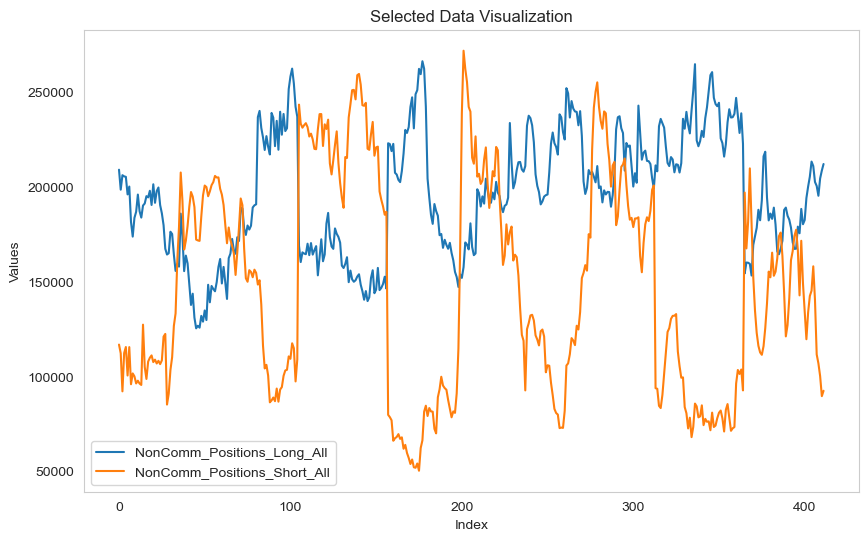

In [177]:
# Plots selected columns from the COT data to visualize long, short positions, and their differences

columns_to_plot = ['NonComm_Positions_Long_All', 'NonComm_Positions_Short_All', "Totall_diff"]

plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    if column in cot_eur_data.columns:
        plt.plot(cot_eur_data[column], label=column)

plt.title("Selected Data Visualization")
plt.xlabel("Index")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.show()

In [178]:
# Merges COT data with EUR/USD daily data based on matching dates, drops redundant columns, sorts by report date, and saves to a new CSV file

df_eur_cot = pd.read_csv(filtered_file_path)
df_eur_cot['Report_Date_as_MM_DD_YYYY'] = pd.to_datetime(df_eur_cot['Report_Date_as_MM_DD_YYYY'])

eurusd_csv_path = 'data/eurusd_daily_data.csv'
df_eurusd = pd.read_csv(eurusd_csv_path)

df_eurusd['Date'] = pd.to_datetime(df_eurusd['Date'])

df_merged = pd.merge(df_eur_cot, df_eurusd, left_on='Report_Date_as_MM_DD_YYYY', right_on='Date', how='left')
df_merged = df_merged.drop(columns=['Date'])

output_csv_path = 'data/merged_eurusd_cot.csv'
df_merged.to_csv(output_csv_path, index=False)

df_merged = df_merged.sort_values(by='Report_Date_as_MM_DD_YYYY').reset_index(drop=True)

In [179]:
# Extracts and prints the last row of specific columns from the merged DataFrame and displays the first five rows of the DataFrame

last_row = df_merged.iloc[-1][['Report_Date_as_MM_DD_YYYY', 'NonComm_Positions_Long_All', 'NonComm_Positions_Short_All', 'Close']]
print(last_row)
df_merged.head()

Report_Date_as_MM_DD_YYYY      2024-11-19 00:00:00
NonComm_Positions_Long_All                  154305
NonComm_Positions_Short_All                 196862
Close                                      1.05949
Name: 411, dtype: object


Market_and_Exchange_Names  As_of_Date_In_Form_YYMMDD  \
0  EURO FX - CHICAGO MERCANTILE EXCHANGE                     170103   
1  EURO FX - CHICAGO MERCANTILE EXCHANGE                     170110   
2  EURO FX - CHICAGO MERCANTILE EXCHANGE                     170117   
3  EURO FX - CHICAGO MERCANTILE EXCHANGE                     170124   
4  EURO FX - CHICAGO MERCANTILE EXCHANGE                     170131   

  Report_Date_as_MM_DD_YYYY  CFTC_Contract_Market_Code CFTC_Market_Code  \
0                2017-01-03                      99741             CME    
1                2017-01-10                      99741             CME    
2                2017-01-17                      99741             CME    
3                2017-01-24                      99741             CME    
4                2017-01-31                      99741             CME    

   CFTC_Region_Code  CFTC_Commodity_Code  Open_Interest_All  \
0                 0                   99             416239   
1                 0                   99             415212   
2                 0                   99             415090   
3                 0                   99             414447   
4                 0                   99             405541   

   NonComm_Positions_Long_All  NonComm_Positions_Short_All  ...  \
0                      129701                       199757  ...   
1                      134747                       200570  ...   
2                      128846                       195346  ...   
3                      131904                       184252  ...   
4                      125689                       171402  ...   

   Conc_Net_LE_4_TDR_Short_Other  Conc_Net_LE_8_TDR_Long_Other  \
0                            0.0                           0.0   
1                            0.0                           0.0   
2                            0.0                           0.0   
3                            0.0                           0.0   
4                            0.0                           0.0   

   Conc_Net_LE_8_TDR_Short_Other              Contract_Units      Open  \
0                            0.0  (CONTRACTS OF EUR 125,000)  1.045916   
1                            0.0  (CONTRACTS OF EUR 125,000)  1.058761   
2                            0.0  (CONTRACTS OF EUR 125,000)  1.060389   
3                            0.0  (CONTRACTS OF EUR 125,000)  1.075755   
4                            0.0  (CONTRACTS OF EUR 125,000)  1.070710   

       High       Low     Close  Adj Close  Volume  
0  1.049208  1.034768  1.046003   1.046003     0.0  
1  1.062586  1.056189  1.058862   1.058862     0.0  
2  1.071800  1.060142  1.060299   1.060299     0.0  
3  1.077284  1.072777  1.076079   1.076079     0.0  
4  1.081034  1.068604  1.070859   1.070859     0.0  

[5 rows x 132 columns]

In [180]:
# Calculates net positions for non-commercial and commercial traders, total difference, and rolling medians for total difference and closing price

df_merged["Netto_Position_NonCom"] = df_merged["NonComm_Positions_Long_All"] - df_merged["NonComm_Positions_Short_All"]
df_merged["Netto_Position_Com"] = df_merged["Comm_Positions_Long_All"] - df_merged["Comm_Positions_Short_All"]
df_merged["Totall_diff"] = df_merged["Netto_Position_Com"].abs() - df_merged["Netto_Position_NonCom"].abs()
df_merged["Median_Total_diff"] = df_merged["Totall_diff"].rolling(window=20).median()
df_merged["Median_Close_Price"] = df_merged["Close"].rolling(window=6).median()

# Calculate RSI
def calculate_rsi(data, column="Close", window=14):
    delta = data[column].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# First calculate RSI, then calculate its median
df_merged["RSI"] = calculate_rsi(df_merged, column="Median_Close_Price")
df_merged['Median_RSI'] = df_merged['RSI'].rolling(window=6).median()

df_merged.head(10)

Market_and_Exchange_Names  As_of_Date_In_Form_YYMMDD  \
0  EURO FX - CHICAGO MERCANTILE EXCHANGE                     170103   
1  EURO FX - CHICAGO MERCANTILE EXCHANGE                     170110   
2  EURO FX - CHICAGO MERCANTILE EXCHANGE                     170117   
3  EURO FX - CHICAGO MERCANTILE EXCHANGE                     170124   
4  EURO FX - CHICAGO MERCANTILE EXCHANGE                     170131   
5  EURO FX - CHICAGO MERCANTILE EXCHANGE                     170207   
6  EURO FX - CHICAGO MERCANTILE EXCHANGE                     170214   
7  EURO FX - CHICAGO MERCANTILE EXCHANGE                     170221   
8  EURO FX - CHICAGO MERCANTILE EXCHANGE                     170228   
9  EURO FX - CHICAGO MERCANTILE EXCHANGE                     170307   

  Report_Date_as_MM_DD_YYYY  CFTC_Contract_Market_Code CFTC_Market_Code  \
0                2017-01-03                      99741             CME    
1                2017-01-10                      99741             CME    
2                2017-01-17                      99741             CME    
3                2017-01-24                      99741             CME    
4                2017-01-31                      99741             CME    
5                2017-02-07                      99741             CME    
6                2017-02-14                      99741             CME    
7                2017-02-21                      99741             CME    
8                2017-02-28                      99741             CME    
9                2017-03-07                      99741             CME    

   CFTC_Region_Code  CFTC_Commodity_Code  Open_Interest_All  \
0                 0                   99             416239   
1                 0                   99             415212   
2                 0                   99             415090   
3                 0                   99             414447   
4                 0                   99             405541   
5                 0                   99             409178   
6                 0                   99             406350   
7                 0                   99             417129   
8                 0                   99             431635   
9                 0                   99             435309   

   NonComm_Positions_Long_All  NonComm_Positions_Short_All  ...     Close  \
0                      129701                       199757  ...  1.046003   
1                      134747                       200570  ...  1.058862   
2                      128846                       195346  ...  1.060299   
3                      131904                       184252  ...  1.076079   
4                      125689                       171402  ...  1.070859   
5                      126708                       171659  ...  1.074322   
6                      125333                       172097  ...  1.059850   
7                      130981                       189232  ...  1.060940   
8                      143584                       194748  ...  1.058425   
9                      137662                       197163  ...  1.057921   

   Adj Close  Volume  Netto_Position_NonCom  Netto_Position_Com  Totall_diff  \
0   1.046003     0.0                 -70056               73705         3649   
1   1.058862     0.0                 -65823               72830         7007   
2   1.060299     0.0                 -66500               74577         8077   
3   1.076079     0.0                 -52348               60267         7919   
4   1.070859     0.0                 -45713               53278         7565   
5   1.074322     0.0                 -44951               48855         3904   
6   1.059850     0.0                 -46764               57439        10675   
7   1.060940     0.0                 -58251               64249         5998   
8   1.058425     0.0                 -51164               58524         7360   
9   1.057921     0.0                 -59501               66771  

In [181]:
print(df_merged.columns.tolist())

['Market_and_Exchange_Names', 'As_of_Date_In_Form_YYMMDD', 'Report_Date_as_MM_DD_YYYY', 'CFTC_Contract_Market_Code', 'CFTC_Market_Code', 'CFTC_Region_Code', 'CFTC_Commodity_Code', 'Open_Interest_All', 'NonComm_Positions_Long_All', 'NonComm_Positions_Short_All', 'NonComm_Postions_Spread_All', 'Comm_Positions_Long_All', 'Comm_Positions_Short_All', 'Tot_Rept_Positions_Long_All', 'Tot_Rept_Positions_Short_All', 'NonRept_Positions_Long_All', 'NonRept_Positions_Short_All', 'Open_Interest_Old', 'NonComm_Positions_Long_Old', 'NonComm_Positions_Short_Old', 'NonComm_Positions_Spread_Old', 'Comm_Positions_Long_Old', 'Comm_Positions_Short_Old', 'Tot_Rept_Positions_Long_Old', 'Tot_Rept_Positions_Short_Old', 'NonRept_Positions_Long_Old', 'NonRept_Positions_Short_Old', 'Open_Interest_Other', 'NonComm_Positions_Long_Other', 'NonComm_Positions_Short_Other', 'NonComm_Positions_Spread_Other', 'Comm_Positions_Long_Other', 'Comm_Positions_Short_Other', 'Tot_Rept_Positions_Long_Other', 'Tot_Rept_Positions_S

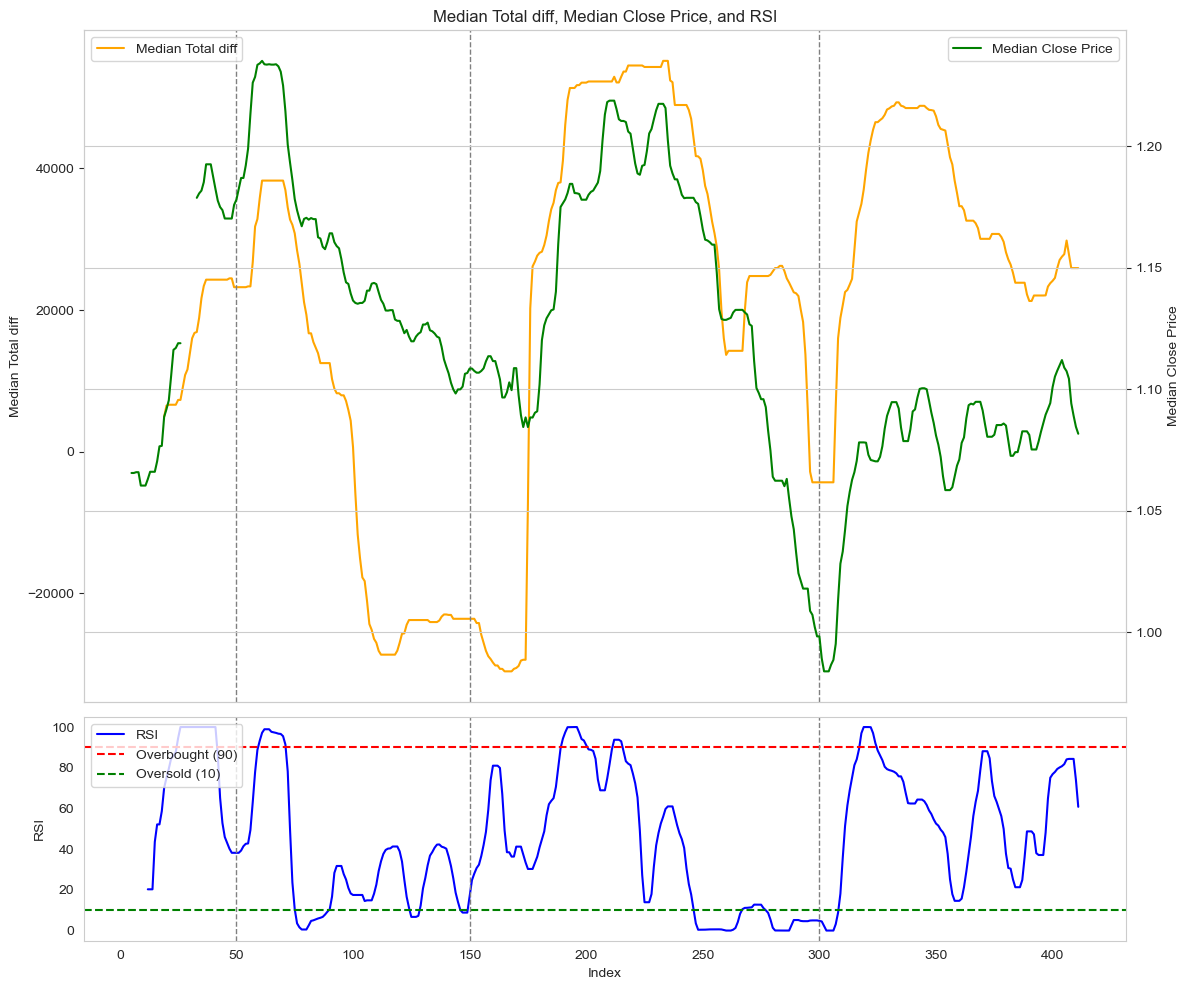

In [182]:
# Definiowanie danych
x = df_merged.index
median_total_diff = df_merged["Median_Total_diff"]
median_close_price = df_merged["Median_Close_Price"]
rsi = df_merged['Median_RSI']

# Tworzenie figurki z dwoma podwykresami (górny dla Median Total diff i Median Close Price, dolny dla RSI)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Górny wykres z dwiema osiami Y
ax1.set_title("Median Total diff, Median Close Price, and RSI")
ax1.plot(x, median_total_diff, color='orange', label='Median Total diff')
ax1.set_ylabel("Median Total diff")
ax1.legend(loc='upper left')

ax1b = ax1.twinx()
ax1b.plot(x, median_close_price, color='green', label='Median Close Price')
ax1b.set_ylabel("Median Close Price")
ax1b.legend(loc='upper right')

# Dolny wykres dla RSI
ax2.plot(x, rsi, color='blue', label='RSI')
ax2.axhline(90, linestyle='--', color='red', label='Overbought (90)')
ax2.axhline(10, linestyle='--', color='green', label='Oversold (10)')
ax2.set_xlabel("Index")
ax2.set_ylabel("RSI")
ax2.legend(loc='upper left')

# Dodanie pionowych linii
vertical_lines = [50, 150, 300]  # Indeksy, gdzie chcesz dodać pionowe linie
for vline in vertical_lines:
    ax1.axvline(vline, color='grey', linestyle='--', linewidth=1)  # Pionowa linia na górnym wykresie
    ax2.axvline(vline, color='grey', linestyle='--', linewidth=1)  # Pionowa linia na dolnym wykresie

# Dodanie siatki i dostosowanie układu
ax1.grid()
ax2.grid()
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

In [183]:
# df_merged.to_csv('data/merged_eurusd_cot_updated.csv')

In [184]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Założenie, że masz już poniższe dane w df_merged
median_total_diff = df_merged["Median_Total_diff"]
median_close_price = df_merged["Median_Close_Price"]
rsi = df_merged['RSI']
median_rsi = df_merged['Median_RSI']

# Tworzenie dataframe z istniejących zmiennych
data = pd.DataFrame({
    'Median_Total_diff': median_total_diff,
    'Median_Close_Price': median_close_price,
    'RSI': rsi,
    'Median_RSI': median_rsi
})

# Feature engineering: Dodanie opóźnionych zmiennych (lag features)
for lag in range(1, 6):  # Dodanie lagów do 5 okresów
    data[f'Median_Total_diff_lag{lag}'] = data['Median_Total_diff'].shift(lag)
    data[f'RSI_lag{lag}'] = data['RSI'].shift(lag)

# Usunięcie brakujących wartości powstałych z opóźnień
data = data.dropna()

# Zdefiniowanie cech (features) i celu (target)
X = data.drop(columns=['Median_Close_Price'])
y = data['Median_Close_Price']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Zdefiniowanie modeli do porównania
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(objective='reg:squarederror')
}

# Parametry do optymalizacji dla GridSearch
param_grids = {
    'Random Forest': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [5, 10, None],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 10]
    },
    'XGBoost': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 10]
    }
}

# Budowa Pipeline, optymalizacja modeli i porównanie wyników
best_models = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Pipeline: Standaryzacja, model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Grid Search dla optymalizacji hiperparametrów
    tscv = TimeSeriesSplit(n_splits=5)
    grid = GridSearchCV(pipeline, param_grid=param_grids[model_name], cv=tscv, scoring='r2')
    grid.fit(X_train, y_train)

    # Najlepszy model i jego ocena na zbiorze testowym
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Best params for {model_name}: {grid.best_params_}")
    print(f"Test MSE for {model_name}: {mse:.2f}")
    print(f"Test R^2 for {model_name}: {r2:.2f}\n")

    best_models[model_name] = best_model

# Wybór najlepszego modelu na podstawie wyniku R^2
best_model_name = max(best_models, key=lambda name: r2_score(y_test, best_models[name].predict(X_test)))
print(f"The best model is: {best_model_name} with R^2 = {r2_score(y_test, best_models[best_model_name].predict(X_test)):.2f}")


Training Random Forest...
Best params for Random Forest: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Test MSE for Random Forest: 0.00
Test R^2 for Random Forest: 0.62

Training Gradient Boosting...
Best params for Gradient Boosting: {'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__n_estimators': 200}
Test MSE for Gradient Boosting: 0.00
Test R^2 for Gradient Boosting: 0.52

Training XGBoost...
Best params for XGBoost: {'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__n_estimators': 200}
Test MSE for XGBoost: 0.00
Test R^2 for XGBoost: 0.58

The best model is: Random Forest with R^2 = 0.62


In [191]:
df_merged.info()
df_merged.head(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 411 entries, 2017-01-08 to 2024-11-17
Freq: W-SUN
Columns: 138 entries, Market_and_Exchange_Names to Median_RSI
dtypes: float64(135), object(3)
memory usage: 446.3+ KB


Market_and_Exchange_Names  \
Report_Date_as_MM_DD_YYYY                             
2017-01-08                                      NaN   
2017-01-15                                      NaN   
2017-01-22                                      NaN   
2017-01-29                                      NaN   
2017-02-05                                      NaN   
2017-02-12                                      NaN   
2017-02-19                                      NaN   
2017-02-26                                      NaN   
2017-03-05                                      NaN   
2017-03-12                                      NaN   

                           As_of_Date_In_Form_YYMMDD  \
Report_Date_as_MM_DD_YYYY                              
2017-01-08                                       NaN   
2017-01-15                                       NaN   
2017-01-22                                       NaN   
2017-01-29                                       NaN   
2017-02-05                                       NaN   
2017-02-12                                       NaN   
2017-02-19                                       NaN   
2017-02-26                                       NaN   
2017-03-05                                       NaN   
2017-03-12                                       NaN   

                           CFTC_Contract_Market_Code CFTC_Market_Code  \
Report_Date_as_MM_DD_YYYY                                               
2017-01-08                                       NaN              NaN   
2017-01-15                                       NaN              NaN   
2017-01-22                                       NaN              NaN   
2017-01-29                                       NaN              NaN   
2017-02-05                                       NaN              NaN   
2017-02-12                                       NaN              NaN   
2017-02-19                                       NaN              NaN   
2017-02-26                                       NaN              NaN   
2017-03-05                                       NaN              NaN   
2017-03-12                                       NaN              NaN   

                           CFTC_Region_Code  CFTC_Commodity_Code  \
Report_Date_as_MM_DD_YYYY                                          
2017-01-08                              NaN                  NaN   
2017-01-15                              NaN                  NaN   
2017-01-22                              NaN                  NaN   
2017-01-29                              NaN                  NaN   
2017-02-05                              NaN                  NaN   
2017-02-12                              NaN                  NaN   
2017-02-19                              NaN                  NaN   
2017-02-26                              NaN                  NaN   
2017-03-05                              NaN                  NaN   
2017-03-12                              NaN                  NaN   

                           Open_Interest_All  NonComm_Positions_Long_All  \
Report_Date_as_MM_DD_YYYY                                                  
2017-01-08                               NaN                         NaN   
2017-01-15                               NaN                         NaN   
2017-01-22                               NaN                         NaN   
2017-01-29                               NaN                         NaN   
2017-02-05                               NaN                         NaN   
2017-02-12                               NaN                         NaN   
2017-02-19                               NaN                         NaN   
2017-02-26                               NaN                         NaN   
2017-03-05                               NaN                         NaN   
2017-03-12                               NaN                         NaN   

                           NonComm_Positions_Short_All  \
Report_Date_as_MM_DD_YYYY  

In [190]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Założenie, że masz już dane w df_merged
df_merged['Report_Date_as_MM_DD_YYYY'] = pd.to_datetime(df_merged['Report_Date_as_MM_DD_YYYY'])
df_merged = df_merged.dropna(subset=['Report_Date_as_MM_DD_YYYY'])  # Usunięcie wierszy bez daty
df_merged.set_index('Report_Date_as_MM_DD_YYYY', inplace=True)

# Sprawdzenie, czy kolumna 'Median_Close_Price' istnieje
if 'Median_Close_Price' not in df_merged.columns:
    raise KeyError("Column 'Median_Close_Price' not found in df_merged.")

# Wybór kolumny docelowej, którą chcemy modelować
y = df_merged['Median_Close_Price']

# Podział na zbiór treningowy i testowy (80% danych na trening, 20% na test)
train_size = int(len(y) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]

# Trening modelu ARIMA
order = (5, 1, 0)  # Parametry (p, d, q) dla ARIMA, można je dostosować w zależności od potrzeb
model_arima = ARIMA(y_train, order=order)
model_arima_fit = model_arima.fit()

# Predykcja na zbiorze testowym
y_pred_arima = model_arima_fit.forecast(steps=len(y_test))

# Ocena modelu ARIMA
mse_arima = mean_squared_error(y_test, y_pred_arima)
r2_arima = r2_score(y_test, y_pred_arima)

print(f"Test MSE for ARIMA: {mse_arima:.2f}")
print(f"Test R^2 for ARIMA: {r2_arima:.2f}\n")

# Wykres porównujący wartości rzeczywiste i prognozowane
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_arima, label='Predicted', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Median Close Price')
plt.title('ARIMA Model - Actual vs Predicted')
plt.legend()
plt.grid()
plt.show()


KeyError: 'Report_Date_as_MM_DD_YYYY'

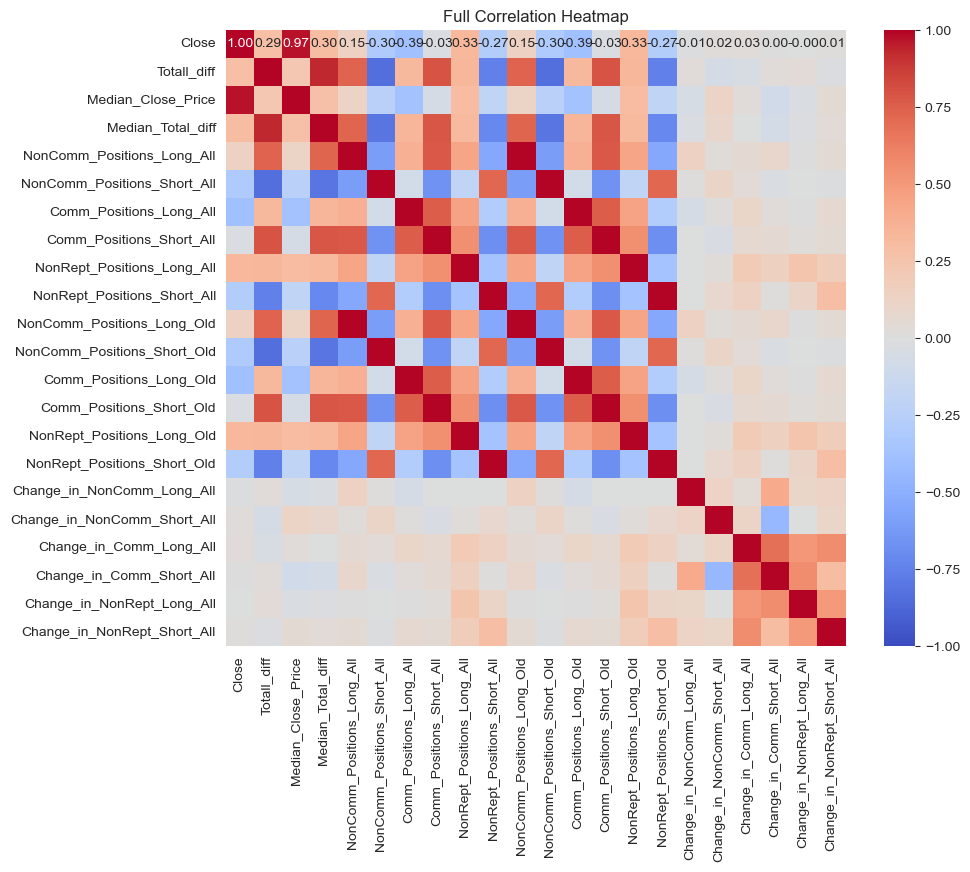

In [34]:
# Selects relevant columns, removes missing values, computes the correlation matrix, and visualizes it as a heatmap to analyze relationships between variables

columns_to_check = [
    'Close',
    'Totall_diff',
    'Median_Close_Price',
    'Median_Total_diff',
    'NonComm_Positions_Long_All',
    'NonComm_Positions_Short_All',
    'Comm_Positions_Long_All',
    'Comm_Positions_Short_All',
    'NonRept_Positions_Long_All',
    'NonRept_Positions_Short_All',
    'NonComm_Positions_Long_Old',
    'NonComm_Positions_Short_Old',
    'Comm_Positions_Long_Old',
    'Comm_Positions_Short_Old',
    'NonRept_Positions_Long_Old',
    'NonRept_Positions_Short_Old',
    'Change_in_NonComm_Long_All',
    'Change_in_NonComm_Short_All',
    'Change_in_Comm_Long_All',
    'Change_in_Comm_Short_All',
    'Change_in_NonRept_Long_All',
    'Change_in_NonRept_Short_All'
]

df_correlation = df_merged[columns_to_check]
df_correlation = df_correlation.dropna()

correlation_matrix = df_correlation.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    cbar=True, 
    vmin=-1, 
    vmax=1
)
plt.title("Full Correlation Heatmap")
plt.show()

## unsupervised learning

In [188]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
from sklearn.metrics import silhouette_score


In [189]:
columns_to_use = [
    'NonComm_Positions_Long_All', 'NonComm_Positions_Short_All', 'Comm_Positions_Long_All',
    'Comm_Positions_Short_All', 'NonRept_Positions_Long_All', 'NonRept_Positions_Short_All',
    'NonComm_Positions_Long_Old', 'NonComm_Positions_Short_Old', 'Comm_Positions_Long_Old',
    'Comm_Positions_Short_Old', 'NonRept_Positions_Long_Old', 'NonRept_Positions_Short_Old',
    'Change_in_NonComm_Long_All', 'Change_in_NonComm_Short_All', 'Change_in_Comm_Long_All',
    'Change_in_Comm_Short_All', 'Change_in_NonRept_Long_All', 'Change_in_NonRept_Short_All',
    'Close', 'Totall_diff', 'Median_Total_diff', 'Median_Close_Price'
]

df_unsupervised = df_merged[columns_to_use].dropna()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_unsupervised)

C:\Users\48666\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


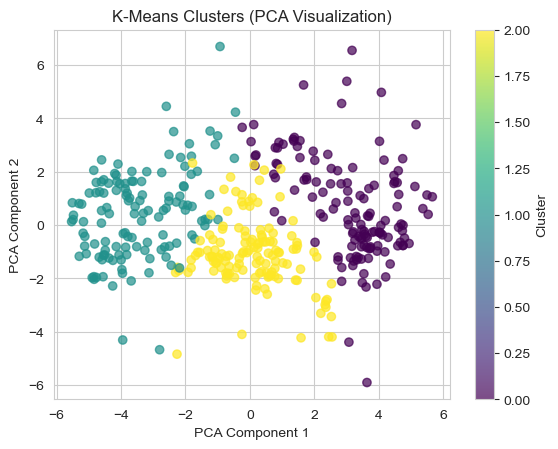

In [190]:
os.environ["OMP_NUM_THREADS"] = "1"

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) 
clusters = kmeans.fit_predict(data_scaled)

df_unsupervised['Cluster'] = clusters

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('K-Means Clusters (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [191]:
# Group by cluster and calculate mean for each feature
cluster_summary = df_unsupervised.groupby('Cluster').mean()
print(cluster_summary)


         NonComm_Positions_Long_All  NonComm_Positions_Short_All  \
Cluster                                                            
0                     169240.014493                182769.181159   
1                     225600.488372                 91567.751938   
2                     196976.223881                163438.708955   

         Comm_Positions_Long_All  Comm_Positions_Short_All  \
Cluster                                                      
0                  242175.050725             249624.760870   
1                  355492.604651             537894.193798   
2                  378945.820896             439555.238806   

         NonRept_Positions_Long_All  NonRept_Positions_Short_All  \
Cluster                                                            
0                      79611.623188                 58632.746377   
1                      92099.279070                 43730.426357   
2                      81115.156716                 54043.253731   

       

In [192]:
score = silhouette_score(data_scaled, clusters)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.21140556298511262


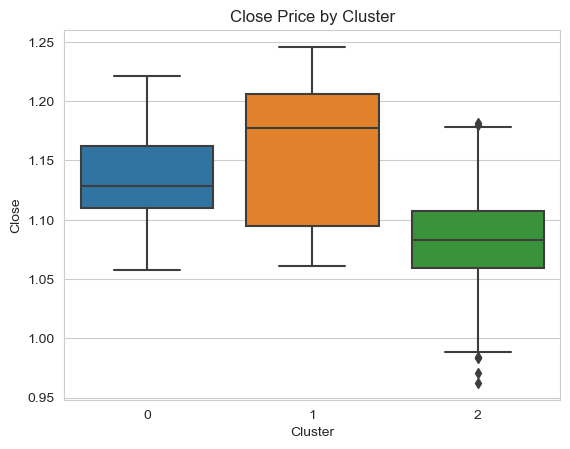

In [193]:
sns.boxplot(x='Cluster', y='Close', data=df_unsupervised)
plt.title('Close Price by Cluster')
plt.show()


C:\Users\48666\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\48666\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\48666\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\48666\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

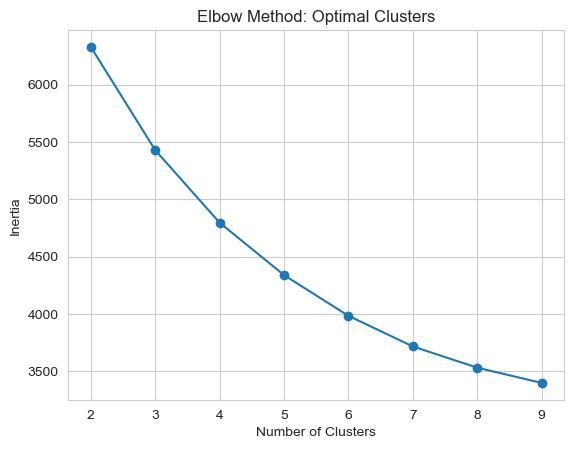

In [194]:
os.environ["OMP_NUM_THREADS"] = "1"
# Elbow method to find optimal n_clusters
inertia = []
cluster_range = range(2, 10)  # Test between 2 and 10 clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot inertia
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method: Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [195]:
from sklearn.metrics import silhouette_score

kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_3 = kmeans_3.fit_predict(data_scaled)
score_3 = silhouette_score(data_scaled, clusters_3)
print(f"Silhouette Score for 3 Clusters: {score_3}")

kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters_4 = kmeans_4.fit_predict(data_scaled)
score_4 = silhouette_score(data_scaled, clusters_4)
print(f"Silhouette Score for 4 Clusters: {score_4}")


C:\Users\48666\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score for 3 Clusters: 0.21140556298511262


C:\Users\48666\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score for 4 Clusters: 0.2341964426042387


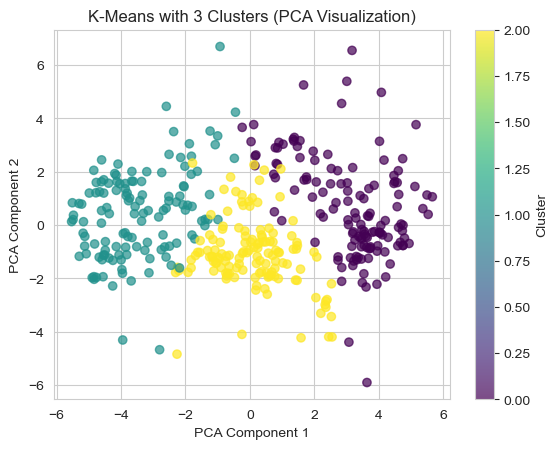

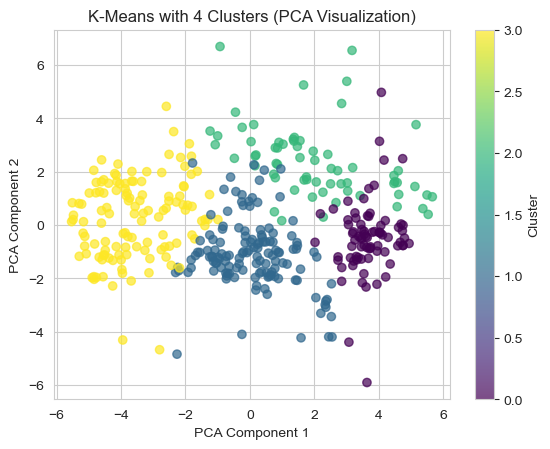

In [196]:
# Visualize 3 clusters
plt.figure()
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_3, cmap='viridis', alpha=0.7)
plt.title('K-Means with 3 Clusters (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Visualize 4 clusters
plt.figure()
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_4, cmap='viridis', alpha=0.7)
plt.title('K-Means with 4 Clusters (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [197]:
df_unsupervised['Cluster_3'] = clusters_3
df_unsupervised['Cluster_4'] = clusters_4

print("Cluster Summary for 3 Clusters:")
print(df_unsupervised.groupby('Cluster_3').mean())

print("Cluster Summary for 4 Clusters:")
print(df_unsupervised.groupby('Cluster_4').mean())


Cluster Summary for 3 Clusters:
           NonComm_Positions_Long_All  NonComm_Positions_Short_All  \
Cluster_3                                                            
0                       169240.014493                182769.181159   
1                       225600.488372                 91567.751938   
2                       196976.223881                163438.708955   

           Comm_Positions_Long_All  Comm_Positions_Short_All  \
Cluster_3                                                      
0                    242175.050725             249624.760870   
1                    355492.604651             537894.193798   
2                    378945.820896             439555.238806   

           NonRept_Positions_Long_All  NonRept_Positions_Short_All  \
Cluster_3                                                            
0                        79611.623188                 58632.746377   
1                        92099.279070                 43730.426357   
2               

Observations for the 3-Cluster Solution

    Cluster 0 (Largest Positions Long and Short):
        NonComm_Positions_Long_All and NonComm_Positions_Short_All: This cluster has the highest long positions (231,377) and relatively large short positions (90,745).
        Close Price: Lower average close price (1.0842), suggesting lower market values align with higher long positions.
        Change_in_NonComm_Long_All: Small negative change in long positions, indicating this cluster tends to have stable or slightly reduced long positions.

    Cluster 1 (Moderate Positions):
        NonComm_Positions_Long_All and NonComm_Positions_Short_All: Medium long positions (219,177) and short positions (86,354).
        Close Price: Higher average close price (1.1888), suggesting this cluster aligns with rising market trends.
        Change_in_NonComm_Long_All: Small positive change in long positions.

    Cluster 2 (High Short, Low Long):
        NonComm_Positions_Long_All and NonComm_Positions_Short_All: Lowest long positions (193,398) and the highest short positions (171,050).
        Close Price: Close price (1.0895) is moderate, indicating mixed market sentiment.
        Change_in_NonComm_Long_All: Small negative change in long positions.

Summary for 3 Clusters:

    Cluster 0 represents stable or bearish conditions with higher long positions.
    Cluster 1 represents bullish conditions with rising close prices.
    Cluster 2 indicates bearish or mixed market sentiment with high short positions.
    
Observations for the 4-Cluster Solution

    Cluster 0 (High Shorts, Moderate Longs):
        NonComm_Positions_Long_All and NonComm_Positions_Short_All: Lowest long positions (196,340) and highest short positions (180,581).
        Close Price: Moderate close price (1.0892).
        Change_in_NonComm_Long_All: Slightly positive change in long positions, suggesting cautious optimism.

    Cluster 1 (Large Positions):
        NonComm_Positions_Long_All and NonComm_Positions_Short_All: High long positions (231,100) and relatively low short positions (90,567).
        Close Price: Lowest close price (1.0844).
        Change_in_Comm_Long_All: Positive change in long positions.

    Cluster 2 (Low Positions, Volatility):
        NonComm_Positions_Long_All and NonComm_Positions_Short_All: Lowest long positions (183,029) and moderate short positions (113,396).
        Close Price: Slightly higher close price (1.0960).
        Change_in_Comm_Long_All: Significant negative change, suggesting possible high market volatility.

    Cluster 3 (Bullish Market):
        NonComm_Positions_Long_All and NonComm_Positions_Short_All: Moderate long positions (220,202) and low short positions (86,296).
        Close Price: Highest close price (1.1897).
        Change_in_NonComm_Long_All: Positive change, indicating bullish conditions.

Summary for 4 Clusters:

    Cluster 0 shows high short positions, aligning with bearish conditions.
    Cluster 1 represents large positions, likely associated with institutional stability.
    Cluster 2 shows low positions and high volatility, possibly indicating mixed market sentiment.
    Cluster 3 aligns with bullish market conditions and rising prices.

Comparing 3 vs. 4 Clusters

    3 Clusters:
        Simpler and easier to interpret.
        Provides clear segmentation between bullish, bearish, and mixed conditions.
    4 Clusters:
        Adds nuance by separating low positions with volatility (Cluster 2) and high bullish market sentiment (Cluster 3).
        Offers better granularity but is slightly more complex to interpret.
        
Recommendations

    Choose 4 Clusters if:
        You need more detailed segmentation for trading strategies (e.g., handling volatility separately).
        You want to identify nuanced market behaviors.

    Stick to 3 Clusters if:
        Simplicity and interpretability are more important.
        You are satisfied with broader market trends without differentiating volatility.

Next Steps

    Model Development:
        Use cluster labels as features in a supervised learning model to predict market behavior (e.g., Close price movement).

## supervised learning model 

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [199]:
features = df_unsupervised[['Cluster_3', 'Cluster_4']]  
target = df_unsupervised['Close'] 

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [200]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [201]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.001994742670225046
R² Score: 0.39646628561077557


In [202]:
# Feature importance
importance = model.feature_importances_
for i, col in enumerate(features.columns):
    print(f"Feature: {col}, Importance: {importance[i]}")


Feature: Cluster_3, Importance: 0.7836345129181695
Feature: Cluster_4, Importance: 0.21636548708183043


Insights:

    Cluster_4 is More Relevant: The Cluster_4 segmentation provides more useful groupings for predicting the Close price. 
    It might capture differences in the market conditions (e.g., bearish, bullish, or volatile periods) better than Cluster_3.

    Cluster_3 Adds Minimal Value: Since Cluster_3 has low importance, it may not add much value as a predictor. 
    You can consider excluding it or combining it with additional features.

2. Explore Other Models

Test different regression models to compare performance:

    Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost)

In [203]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R² Score: {r2_xgb}")


XGBoost Mean Squared Error: 0.0019967277013240767
XGBoost R² Score: 0.39586569025065266


In [204]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# Train a LightGBM Regressor
lgb_model = lgb.LGBMRegressor(random_state=42, n_estimators=100)
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM Mean Squared Error: {mse_lgb}")
print(f"LightGBM R² Score: {r2_lgb}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 2
[LightGBM] [Info] Start training from score 1.122141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [205]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
}

grid = GridSearchCV(lgb.LGBMRegressor(force_col_wise=True, random_state=42), param_grid, cv=5, scoring='r2', verbose=2)
grid.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best R² Score:", grid.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Total Bins 7
[LightGBM] [Info] Number of data points in the train set: 256, number of used features: 2
[LightGBM] [Info] Start training from score 1.123414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [206]:
importance = lgb_model.feature_importances_
for i, col in enumerate(features.columns):
    print(f"Feature: {col}, Importance: {importance[i]}")


Feature: Cluster_3, Importance: 146
Feature: Cluster_4, Importance: 154
